# Statistics for Data Science

In [1]:
import torch
import matplotlib.pyplot as plt

## Location

## Variability

### Variance

Variance gives us a way of thinking about how dispersed the data set is we are looking at.

It's defined as the average of the squared differences from the mean. 

In [2]:
t = torch.tensor([1.,2.,4.,18.])

First we find the mean. 

In [3]:
m = t.mean(); m

tensor(6.2500)

Now if we'd like to figure out what the average deviation from the mean is we could try to simply substract the mean from each point and then take the mean of that:

In [4]:
(t-m).mean()

tensor(0.)

But this won't work because we need to remember what we did to get the mean:

$$ \displaystyle \mu = \frac{\sum_i^n x_i}{n} = \frac{x_1 + x_2 ... x_n}{n}$$

In [5]:
t.sum() / t.shape[0]

tensor(6.2500)

If w

Instead, its necessary to square the deviation for each turn before summing. This will eliminate the negative so the sum will reflect the overall dispersion of the data from the mean. 

In [6]:
a = torch.rand((100,)) * 100
am = t.mean()

In [7]:
%timeit -n 100 (a-am).pow(2).mean()

13.7 µs ± 603 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


Another way of caculating the variance is by using the expected value:

$$ E[X^2] - E[X]^2$$

In [8]:
%timeit -n 100  (a*a).mean() - a.mean().pow(2)

23.2 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Pytorch offers two methods for computing the variance:

In [9]:
torch.var(t)

tensor(62.9167)

In [10]:
torch.var(t, unbiased=False)

tensor(47.1875)

Notice that this number is not the same scale as our data.

### Standard Deviation

In [11]:
(t-m).pow(2).mean().sqrt()

tensor(6.8693)

In [12]:
t.std()

tensor(7.9320)

### Absolute Mean Deviation

Absolute Mean Deviation is less sensitive to outliers because we are not taking the square of each deviation.

In [13]:
(t-m).abs().mean()

tensor(5.8750)

In [14]:
18**2 - t.mean()

tensor(317.7500)

### Covariance

Covariance and correlation deal with the relationship between two variables. It gives us a way of describing how two variables are associated. 

$$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$$

In [15]:
t

tensor([ 1.,  2.,  4., 18.])

We need a second vector now. Let's make it related to `t` but add some random noise.

In [16]:
torch.randn_like(t)/10+0.95

tensor([1.0659, 0.9098, 1.0715, 0.8982])

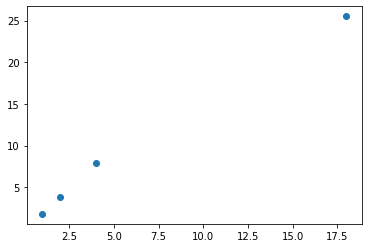

In [17]:
u = t*2
u *= torch.randn_like(t)/10+0.95

plt.scatter(t, u);

In [18]:
prod = (t-t.mean())*(u-u.mean()); prod

tensor([ 41.7930,  25.1089,   4.1658, 184.7104])

In [19]:
prod.mean()

tensor(63.9445)

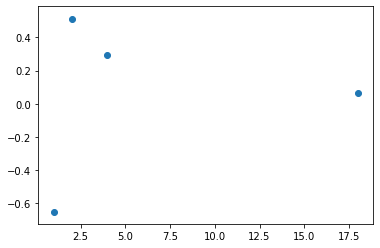

In [20]:
v = torch.randn_like(t)
plt.scatter(t, v);

In [21]:
((t-t.mean())*(v-v.mean())).mean()

tensor(0.3402)

It's generally more conveniently defined like so:

$$\operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]$$

In [22]:
cov = (t*v).mean() - t.mean()*v.mean(); cov

tensor(0.3402)

### Pearson correlation coefficient:

$$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}$$

In [23]:
cov / (t.std()*v.std())

tensor(0.0848)